Numero totale di immagini nel training set: 60000
Numero totale di immagini nel test set: 10000
Dimensione di un batch di immagini: torch.Size([64, 1, 28, 28])
Dimensione di un batch di labels: torch.Size([64])
Labels: 9 7 7 7


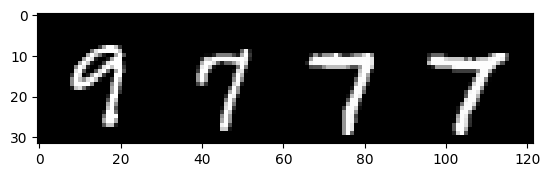

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 1. Definisci le trasformazioni da applicare ai dati
# ToTensor() converte le immagini PIL Image o NumPy ndarray in Tensori PyTorch
# e scala i valori dei pixel da [0, 255] a [0.0, 1.0].
transform = transforms.ToTensor()

# 2. Scarica e carica il dataset MNIST per il training
# root: la directory dove salvare il dataset
# train=True: indica che vogliamo il set di training
# download=True: se il dataset non è presente, lo scarica
# transform: applica le trasformazioni definite sopra
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transform,
                                           download=True)

# 3. Scarica e carica il dataset MNIST per il test
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transform,
                                          download=True)

# 4. Crea i DataLoader
# Questi oggetti ti permettono di iterare sul dataset in batch
# batch_size: il numero di immagini da processare per volta
# shuffle=True: mescola i dati ad ogni epoch per il set di training (utile per l'addestramento)
# num_workers: numero di sottoprocessi da usare per il caricamento dei dati (spesso 0 o 2 per iniziare)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=64, # Un batch tipico è 64 o 128 immagini
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=64,
                         shuffle=False) # Non mescolare il set di test

# --- Puoi anche visualizzare un esempio per vedere cosa hai caricato ---
print(f"Numero totale di immagini nel training set: {len(train_dataset)}")
print(f"Numero totale di immagini nel test set: {len(test_dataset)}")

# Prendi un batch di immagini per visualizzarlo (solo a scopo dimostrativo)
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"Dimensione di un batch di immagini: {images.shape}") # Output: torch.Size([64, 1, 28, 28])
print(f"Dimensione di un batch di labels: {labels.shape}")   # Output: torch.Size([64])

# Funzione per mostrare le immagini (opzionale, ma utile per capire)
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Trasponi per visualizzare correttamente
    plt.show()

# Mostra le prime 4 immagini del batch
print('Labels:', ' '.join(f'{labels[j].item()}' for j in range(4)))
imshow(torchvision.utils.make_grid(images[:4]))

In [3]:
import torch.nn as nn
import torch.nn.functional as F

# 1. Definisci la classe della tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Definiamo gli strati (layers) della nostra rete

        # Strato lineare (Fully Connected): prende 28*28=784 input e li mappa a 128 output
        # Questo è il primo strato "nascosto"
        self.fc1 = nn.Linear(28 * 28, 128)

        # Secondo strato lineare: prende 128 input e li mappa a 64 output
        # Questo è il secondo strato "nascosto"
        self.fc2 = nn.Linear(128, 64)

        # Terzo strato lineare (output): prende 64 input e li mappa a 10 output
        # 10 output perché abbiamo 10 classi (cifre da 0 a 9)
        self.fc3 = nn.Linear(64, 10)

    # 2. Definisci come i dati "fluissono" attraverso la rete (passaggio in avanti)
    def forward(self, x):
        # Prima di passare l'immagine agli strati lineari, dobbiamo "appiattirla"
        # L'immagine è 1x28x28 (Canali x Altezza x Larghezza)
        # La trasformiamo in un vettore lungo 784
        x = x.view(-1, 28 * 28) # Il -1 significa "inferisci la dimensione da solo"

        # Applichiamo il primo strato lineare e poi una funzione di attivazione ReLU
        # La ReLU introduce la non-linearità, essenziale per imparare pattern complessi
        x = F.relu(self.fc1(x))

        # Applichiamo il secondo strato lineare e un'altra ReLU
        x = F.relu(self.fc2(x))

        # Applichiamo l'ultimo strato lineare (senza ReLU)
        # L'output di questo strato sono i "logits" per le 10 classi
        x = self.fc3(x)
        return x

# 3. Crea un'istanza del tuo modello
model = NeuralNetwork()

# Stampa la struttura del modello per vederla
print(model)

# 4. Sposta il modello sulla GPU se disponibile
# Questo è molto importante per accelerare il training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"\nIl modello sarà addestrato su: {device}")

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Il modello sarà addestrato su: cpu


In [4]:
import torch.optim as optim

# Definisci la Funzione di Costo
# Per la classificazione multi-classe, CrossEntropyLoss è la scelta standard
criterion = nn.CrossEntropyLoss()

# Definisci l'Ottimizzatore
# optimizer: ottimizzatore che useremo (es. Adam)
# model.parameters(): dice all'ottimizzatore quali "pesi" del modello deve aggiustare
# lr: "learning rate" (tasso di apprendimento). È un iperparametro cruciale!
#     Determina quanto grandi sono i "passi" che l'ottimizzatore fa ad ogni aggiustamento.
#     Valori tipici sono 0.01, 0.001, 0.0001. Iniziamo con 0.001.
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("\nFunzione di Costo e Ottimizzatore configurati!")
print(f"Funzione di Costo: {criterion}")
print(f"Ottimizzatore: {optimizer}")


Funzione di Costo e Ottimizzatore configurati!
Funzione di Costo: CrossEntropyLoss()
Ottimizzatore: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [5]:
# Imposta il numero di "epoche" (quante volte il modello vedrà l'intero dataset)
num_epochs = 5 # Iniziamo con 5 epoche, puoi aumentarle in seguito

# Ciclo di training principale
for epoch in range(num_epochs):
    # Metti il modello in modalità training
    # Questo è importante perché alcuni strati (come Dropout o BatchNorm)
    # si comportano diversamente in training e in inferenza.
    model.train()

    running_loss = 0.0 # Per tenere traccia della loss media di questa epoca
    correct_predictions = 0 # Per contare le previsioni corrette
    total_predictions = 0 # Per contare il totale delle previsioni

    # Itera su tutti i batch del training_loader
    # data: sono le immagini del batch
    # labels: sono le etichette corrette per quelle immagini
    for i, (images, labels) in enumerate(train_loader):
        # Sposta i dati sulla GPU (o CPU) se disponibile, come abbiamo fatto per il modello
        images = images.to(device)
        labels = labels.to(device)

        # 1. Zero i gradienti dell'ottimizzatore
        # Questo è cruciale! PyTorch accumula i gradienti, quindi dobbiamo resettarli
        # per ogni nuovo batch per evitare che si sommino da iterazioni precedenti.
        optimizer.zero_grad()

        # 2. Forward pass: il modello fa le sue previsioni
        outputs = model(images)

        # 3. Calcola la loss: quanto è lontano il modello dalla verità
        loss = criterion(outputs, labels)

        # 4. Backward pass: calcola i gradienti della loss rispetto ai pesi del modello
        # Questo è il "backpropagation" - la magia che dice come aggiustare i pesi.
        loss.backward()

        # 5. Ottimizzazione: aggiorna i pesi del modello usando i gradienti calcolati
        optimizer.step()

        # Aggiorna la running loss e le statistiche di accuratezza
        running_loss += loss.item() # loss.item() prende il valore Python numerico del tensore loss
        _, predicted = torch.max(outputs.data, 1) # Trova l'indice della classe con la probabilità più alta
        total_predictions += labels.size(0) # Aumenta il conteggio totale delle immagini
        correct_predictions += (predicted == labels).sum().item() # Conta le previsioni corrette

        # Stampa lo stato ogni tot batch per avere un feedback
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Calcola e stampa la loss media e l'accuratezza per l'intera epoca
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = (correct_predictions / total_predictions) * 100
    print(f'Epoch [{epoch+1}/{num_epochs}] Completa. Loss media: {epoch_loss:.4f}, Accuratezza Training: {epoch_accuracy:.2f}%')

print("\nAddestramento completato!")

Epoch [1/5], Step [100/938], Loss: 0.6407
Epoch [1/5], Step [200/938], Loss: 0.3724
Epoch [1/5], Step [300/938], Loss: 0.1120
Epoch [1/5], Step [400/938], Loss: 0.4870
Epoch [1/5], Step [500/938], Loss: 0.2676
Epoch [1/5], Step [600/938], Loss: 0.3327
Epoch [1/5], Step [700/938], Loss: 0.3265
Epoch [1/5], Step [800/938], Loss: 0.2477
Epoch [1/5], Step [900/938], Loss: 0.1249
Epoch [1/5] Completa. Loss media: 0.3384, Accuratezza Training: 90.44%
Epoch [2/5], Step [100/938], Loss: 0.1606
Epoch [2/5], Step [200/938], Loss: 0.0371
Epoch [2/5], Step [300/938], Loss: 0.1612
Epoch [2/5], Step [400/938], Loss: 0.0448
Epoch [2/5], Step [500/938], Loss: 0.1093
Epoch [2/5], Step [600/938], Loss: 0.0973
Epoch [2/5], Step [700/938], Loss: 0.2017
Epoch [2/5], Step [800/938], Loss: 0.0894
Epoch [2/5], Step [900/938], Loss: 0.0847
Epoch [2/5] Completa. Loss media: 0.1390, Accuratezza Training: 95.86%
Epoch [3/5], Step [100/938], Loss: 0.1547
Epoch [3/5], Step [200/938], Loss: 0.0913
Epoch [3/5], Step 

In [6]:
# Metti il modello in modalità valutazione
model.eval()

# Disabilita il calcolo dei gradienti per le operazioni di inferenza
with torch.no_grad():
    correct = 0
    total = 0
    # Itera sui batch del test_loader
    for images, labels in test_loader:
        # Sposta i dati sulla GPU (o CPU) come per il training
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass: il modello fa le previsioni
        outputs = model(images)

        # Trova l'indice della classe con la probabilità più alta
        # torch.max(outputs.data, 1) restituisce (valori_max, indici_max)
        # ci interessa solo gli indici (predicted)
        _, predicted = torch.max(outputs.data, 1)

        # Aggiorna il conteggio totale delle etichette
        total += labels.size(0) # labels.size(0) è la dimensione del batch

        # Aggiorna il conteggio delle previsioni corrette
        # (predicted == labels) crea un tensore booleano (True/False)
        # .sum() somma i True (che sono 1) e i False (che sono 0)
        # .item() converte il tensore di un singolo elemento in un valore Python standard
        correct += (predicted == labels).sum().item()

    # Calcola l'accuratezza finale sul set di test
    accuracy = 100 * correct / total

    print(f'\nAccuratezza del modello sul test set di 10000 immagini: {accuracy:.2f}%')


Accuratezza del modello sul test set di 10000 immagini: 97.64%


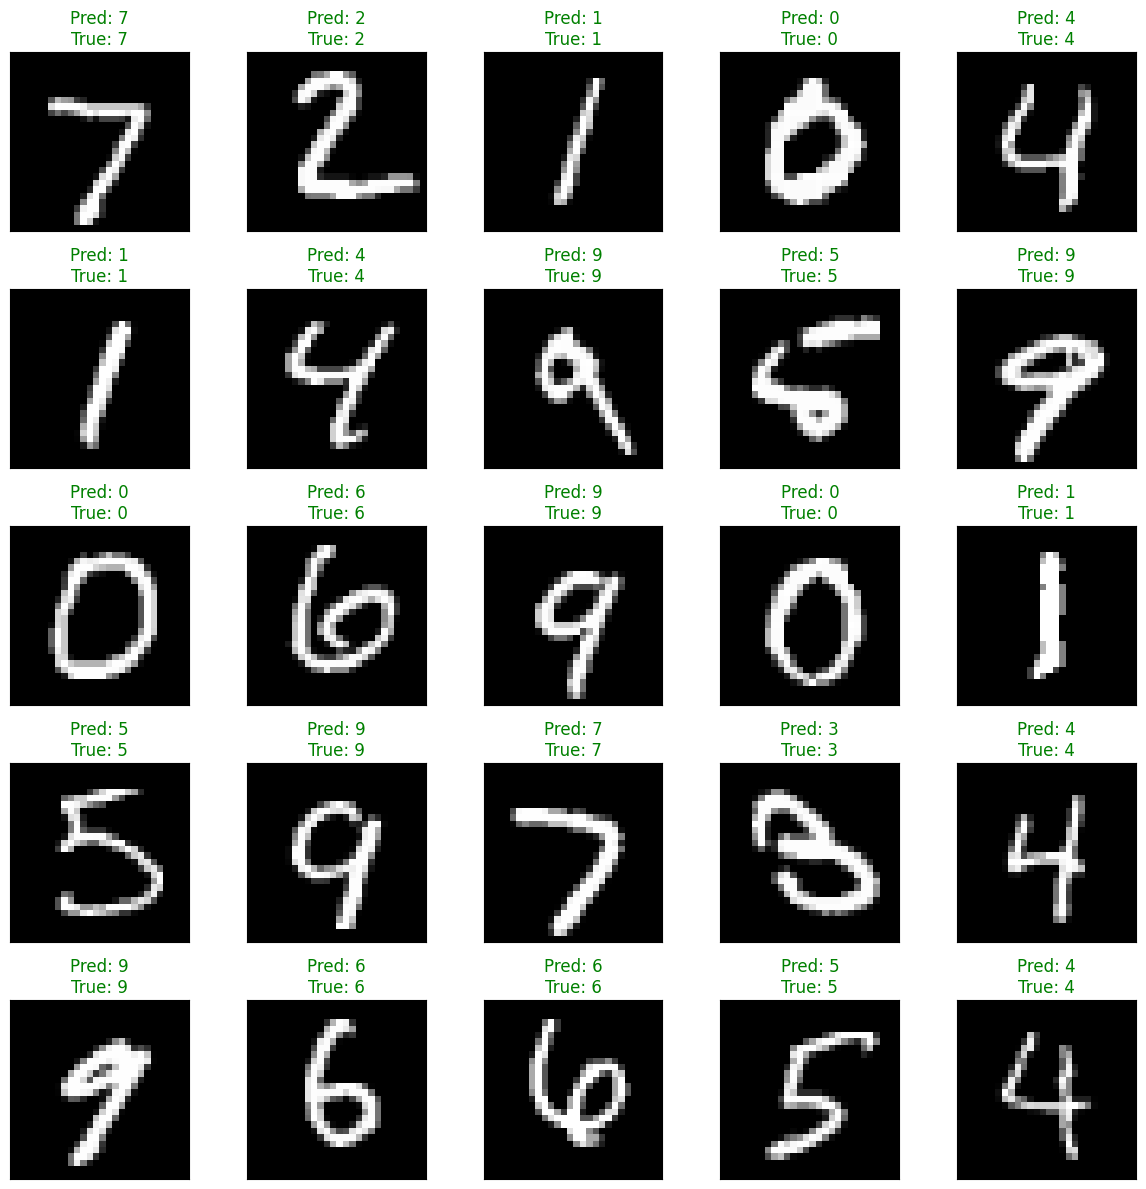

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch # Assicurati che torch sia importato

# Metti il modello in modalità valutazione
model.eval()

# Disabilita il calcolo dei gradienti
with torch.no_grad():
    # Prendi un batch di immagini dal test_loader (dati mai visti)
    # È utile creare un nuovo iteratore per non influenzare i loader esistenti
    dataiter_test = iter(test_loader)
    images, labels = next(dataiter_test)

    # Sposta immagini e etichette sul dispositivo corretto (GPU/CPU)
    images = images.to(device)
    labels = labels.to(device)

    # Fai una previsione con il modello
    outputs = model(images)

    # Ottieni le previsioni della classe (indice con il punteggio più alto)
    _, predicted = torch.max(outputs, 1)

    # --- Ora visualizziamo i risultati ---
    # Converti i tensori PyTorch in NumPy array per la visualizzazione con Matplotlib
    images_np = images.cpu().numpy() # Sposta su CPU prima di convertire in NumPy
    labels_np = labels.cpu().numpy()
    predicted_np = predicted.cpu().numpy()

    # Configura la figura per visualizzare le immagini
    fig = plt.figure(figsize=(12, 12)) # Dimensioni della figura
    for idx in np.arange(25): # Visualizza le prime 25 immagini del batch
        ax = fig.add_subplot(5, 5, idx+1, xticks=[], yticks=[])
        # Immagini MNIST sono 1x28x28, per imshow serve 28x28
        ax.imshow(np.squeeze(images_np[idx]), cmap='gray')

        # Colora il titolo in verde se la previsione è corretta, rosso altrimenti
        title_color = 'green' if predicted_np[idx] == labels_np[idx] else 'red'
        ax.set_title(f"Pred: {predicted_np[idx]}\nTrue: {labels_np[idx]}",
                     color=title_color)
    plt.tight_layout() # Aggiusta la spaziatura tra i subplot
    plt.show()

In [8]:
# Aggiungi questo codice dopo il blocco di visualizzazione delle previsioni
print("\n--- Immagini Classificate Erratamente ---")

incorrect_indices = np.where(predicted_np != labels_np)[0] # Trova gli indici degli errori

if len(incorrect_indices) == 0:
    print("Nessuna immagine classificata erroneamente in questo batch. Ottimo lavoro!")
else:
    fig_errors = plt.figure(figsize=(10, 10))
    for i, idx in enumerate(incorrect_indices[:16]): # Visualizza al massimo 16 errori
        if i >= 16: # Limita a 16 per non ingolfare la visualizzazione
            break
        ax = fig_errors.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images_np[idx]), cmap='gray')
        ax.set_title(f"Pred: {predicted_np[idx]}\nTrue: {labels_np[idx]}",
                     color='red')
    plt.tight_layout()
    plt.show()


--- Immagini Classificate Erratamente ---
Nessuna immagine classificata erroneamente in questo batch. Ottimo lavoro!


In [9]:
import torch # Assicurati che torch sia importato

# Definisci il percorso e il nome del file dove salvare il modello
# È buona pratica usare l'estensione .pth o .pt
model_save_path = 'mnist_neural_network.pth'

# Salva lo stato del modello
# model.state_dict() restituisce un dizionario contenente tutti i parametri addestrabili.
torch.save(model.state_dict(), model_save_path)

print(f"Modello salvato con successo in: {model_save_path}")

Modello salvato con successo in: mnist_neural_network.pth


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# --- 1. Ridefinisci la classe del modello (QUESTO È FONDAMENTALE!) ---
# Se stai eseguendo questo codice in una nuova sessione o in un nuovo file,
# devi copiare qui la definizione esatta della classe NeuralNetwork.
# Se sei nella stessa sessione di Colab e non hai riavviato il runtime,
# la classe è già definita, ma è buona pratica includerla per chiarezza.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# --- 2. Definisci il percorso del file del modello salvato ---
model_save_path = 'mnist_neural_network.pth' # Deve corrispondere al nome con cui lo hai salvato

# --- 3. Crea una nuova istanza del modello (con la stessa architettura) ---
loaded_model = NeuralNetwork()

# --- 4. Sposta il modello sul dispositivo corretto (GPU o CPU) ---
# È importante che il modello sia sullo stesso dispositivo dei dati che gli darai in input.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

# --- 5. Carica lo state_dict dal file e caricalo nell'istanza del modello ---
# torch.load(path, map_location=device) carica il dizionario dei pesi.
# map_location=device è utile per assicurarsi che i pesi vengano caricati
# sul dispositivo corretto, indipendentemente da dove sono stati salvati.
loaded_model.load_state_dict(torch.load(model_save_path, map_location=device))

# --- 6. Metti il modello in modalità valutazione ---
# Cruciale per l'inferenza, disabilita comportamenti specifici del training (es. dropout).
loaded_model.eval()

print(f"Modello caricato con successo da: {model_save_path}")
print("Il modello caricato è pronto per fare previsioni!")

# Ora puoi usare 'loaded_model' per fare nuove previsioni, ad esempio:
# with torch.no_grad():
#     # Prendi un'immagine di test
#     sample_image, sample_label = test_dataset[0]
#     sample_image = sample_image.unsqueeze(0).to(device) # Aggiungi dimensione batch e sposta su device
#     output = loaded_model(sample_image)
#     _, predicted_class = torch.max(output.data, 1)
#     print(f"Previsione per la prima immagine di test: {predicted_class.item()}")
#     print(f"Etichetta reale: {sample_label}")

Modello caricato con successo da: mnist_neural_network.pth
Il modello caricato è pronto per fare previsioni!


Immagine caricata e pre-elaborata. Dimensione del tensore: torch.Size([1, 1, 28, 28])
Il modello prevede che l'immagine sia un: 5


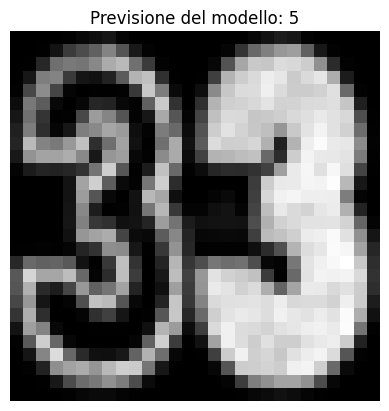

In [14]:
from PIL import Image # Per caricare e manipolare le immagini
import torchvision.transforms as transforms # Le stesse trasformazioni usate per MNIST
import matplotlib.pyplot as plt
import numpy as np
import torch # Assicurati che torch sia importato

# --- Assicurati che il tuo modello sia già caricato e disponibile come 'loaded_model' ---
# Se hai riavviato Colab, devi rieseguire le celle precedenti per:
# 1. Definire la classe NeuralNetwork
# 2. Caricare il modello con loaded_model = NeuralNetwork() e loaded_model.load_state_dict(...)

# 1. Definisci il percorso dell'immagine che hai caricato
image_path = 'images.jpeg' # <--- CAMBIA QUESTO CON IL NOME DEL TUO FILE!

# 2. Definisci le trasformazioni necessarie per la tua immagine
# Devono essere le stesse (o molto simili) a quelle usate per MNIST:
# - Converti in scala di grigi (.L è per Luminance)
# - Ridimensiona a 28x28 pixel
# - Converti in tensore PyTorch
# - Normalizza (MNIST ha pixel da 0 a 255, ToTensor li scala a 0.0-1.0)
transform_custom_image = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # Assicurati che sia in scala di grigi
    transforms.Resize((28, 28)),                 # Ridimensiona a 28x28
    transforms.ToTensor(),                       # Converti in tensore (scala a 0.0-1.0)
    # Se hai normalizzato MNIST con mean/std, dovresti farlo anche qui.
    # Per MNIST semplice con solo ToTensor(), non serve altro qui.
])

# 3. Carica e pre-elabora l'immagine
try:
    image = Image.open(image_path)
    # Applica le trasformazioni
    input_tensor = transform_custom_image(image)

    # Aggiungi una dimensione per il batch (il modello si aspetta [batch_size, channels, height, width])
    # La tua immagine è 1x28x28, il modello si aspetta [1, 1, 28, 28] per una singola immagine
    input_batch = input_tensor.unsqueeze(0) # Aggiunge una dimensione all'inizio

    # Sposta l'input sul dispositivo corretto (GPU o CPU)
    input_batch = input_batch.to(device) # 'device' è la variabile che hai definito prima ('cuda' o 'cpu')

    print(f"Immagine caricata e pre-elaborata. Dimensione del tensore: {input_batch.shape}")

    # 4. Fai una previsione con il modello caricato
    loaded_model.eval() # Metti il modello in modalità valutazione
    with torch.no_grad(): # Disabilita il calcolo dei gradienti
        output = loaded_model(input_batch)

    # Ottieni la classe prevista (l'indice con il punteggio più alto)
    _, predicted_class = torch.max(output.data, 1)

    # Converti il tensore della previsione in un numero Python standard
    predicted_digit = predicted_class.item()

    print(f"Il modello prevede che l'immagine sia un: {predicted_digit}")

    # 5. Visualizza l'immagine e la previsione
    plt.imshow(np.squeeze(input_tensor.cpu().numpy()), cmap='gray')
    plt.title(f"Previsione del modello: {predicted_digit}")
    plt.axis('off') # Nasconde gli assi
    plt.show()

except FileNotFoundError:
    print(f"Errore: Il file '{image_path}' non è stato trovato. Assicurati di averlo caricato su Colab e che il nome sia corretto.")
except Exception as e:
    print(f"Si è verificato un errore durante l'elaborazione dell'immagine: {e}")

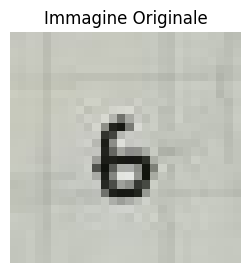

Rilevata immagine con sfondo chiaro (prob. nero su bianco). Inverto i colori.


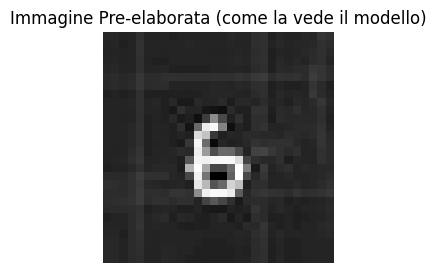

Immagine caricata e pre-elaborata. Dimensione del tensore: torch.Size([1, 1, 28, 28])

Il modello prevede che l'immagine sia un: 2


In [18]:
from PIL import Image # Per caricare e manipolare le immagini
import torchvision.transforms as transforms # Le stesse trasformazioni usate per MNIST
import matplotlib.pyplot as plt
import numpy as np
import torch # Assicurati che torch sia importato

# --- Assicurati che il tuo modello sia già caricato e disponibile come 'loaded_model' ---
# Se hai riavviato Colab, devi rieseguire le celle precedenti per:
# 1. Definire la classe NeuralNetwork
# 2. Caricare il modello con loaded_model = NeuralNetwork() e loaded_model.load_state_dict(...)
# Assicurati anche che la variabile 'device' sia definita.

# 1. Definisci il percorso dell'immagine che hai caricato
# --- CAMBIA QUESTO CON IL NOME ESATTO DEL TUO FILE! ---
image_path = 'photo_2025-07-16_17-51-57.jpg' # Esempio: se hai caricato "mia_cifra_7.png"

# --- Funzione per invertire i colori (se necessario) ---
# Le immagini MNIST hanno cifre bianche su sfondo nero (pixel cifra ~1, sfondo ~0).
# Se la tua immagine è nera su sfondo bianco (pixel cifra ~0, sfondo ~1), dobbiamo invertirla.
def invert_colors_if_needed(image_tensor):
    # Calcola la media dei valori dei pixel. Se è alta (più bianca), probabilmente è nero su bianco.
    mean_pixel_value = image_tensor.mean().item()
    if mean_pixel_value > 0.5: # Euristicamente, se la media è maggiore di 0.5 (su scala 0-1)
        print("Rilevata immagine con sfondo chiaro (prob. nero su bianco). Inverto i colori.")
        return 1 - image_tensor # Inverte i valori (0 diventa 1, 1 diventa 0)
    else:
        print("Rilevata immagine con sfondo scuro (prob. bianco su nero). Nessuna inversione necessaria.")
        return image_tensor

# 2. Definisci le trasformazioni necessarie per la tua immagine
transform_custom_image = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # Assicurati che sia in scala di grigi (1 canale)
    transforms.Resize((28, 28)),                 # Ridimensiona a 28x28 pixel
    transforms.ToTensor(),                       # Converti in tensore e scala a 0.0-1.0
])

# 3. Carica e pre-elabora l'immagine
try:
    image = Image.open(image_path)

    # --- Visualizza l'immagine originale ---
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='gray')
    plt.title("Immagine Originale")
    plt.axis('off')
    plt.show()

    # Applica le trasformazioni di base (grayscale, resize, ToTensor)
    input_tensor = transform_custom_image(image)

    # --- Applica l'inversione dei colori se necessario ---
    input_tensor = invert_colors_if_needed(input_tensor)

    # --- VISUALIZZA L'IMMAGINE DOPO LA PRE-ELABORAZIONE ---
    # Questo è FONDAMENTALE per il debugging!
    # L'immagine qui sotto DEVE assomigliare a un'immagine MNIST (cifra bianca su sfondo nero)
    plt.figure(figsize=(3, 3))
    plt.imshow(np.squeeze(input_tensor.cpu().numpy()), cmap='gray')
    plt.title("Immagine Pre-elaborata (come la vede il modello)")
    plt.axis('off')
    plt.show()


    # Aggiungi una dimensione per il batch (il modello si aspetta [batch_size, channels, height, width])
    # Per una singola immagine, sarà [1, 1, 28, 28]
    input_batch = input_tensor.unsqueeze(0)

    # Sposta l'input sul dispositivo corretto (GPU o CPU)
    input_batch = input_batch.to(device)

    print(f"Immagine caricata e pre-elaborata. Dimensione del tensore: {input_batch.shape}")

    # 4. Fai una previsione con il modello caricato
    loaded_model.eval() # Metti il modello in modalità valutazione
    with torch.no_grad(): # Disabilita il calcolo dei gradienti
        output = loaded_model(input_batch)

    # Ottieni la classe prevista (l'indice con il punteggio più alto)
    _, predicted_class = torch.max(output.data, 1)

    # Converti il tensore della previsione in un numero Python standard
    predicted_digit = predicted_class.item()

    print(f"\nIl modello prevede che l'immagine sia un: {predicted_digit}")

except FileNotFoundError:
    print(f"Errore: Il file '{image_path}' non è stato trovato. Assicurati di averlo caricato su Colab e che il nome sia corretto.")
except Exception as e:
    print(f"Si è verificato un errore durante l'elaborazione dell'immagine: {e}")